# Analysis of the thermal effects of a lightning strike on a structural element

This exercise analyses the thermal effects of a lightning strike on a structural element by solving the two-dimensional transient heat conduction equation. The study is essential for understanding how extreme heat impacts the structural integrity of materials, as lightning strikes generate intense, rapid pulses of energy that induce significant temperature variations. The analysis involves numerically solving the heat conduction equation to simulate the time-dependent temperature distribution within the material. The heat source is modelled as a time-varying Hertzian distribution, incorporating both the spatial and temporal characteristics of the lightning strike. This approach facilitates the identification of thermal hotspots and the assessment of risks associated with material failure or ignition.


## Problem formulation

To evaluate the thermal effects of a lightning strike on a structural element, a mathematical model is developed based on heat conduction principles. The rapid energy transfer from the strike induces significant temperature variations, potentially leading to material failure or ignition. This study employs numerical methods to solve the transient heat conduction equation, capturing the time-dependent temperature distribution and identifying thermal hotspots.

### Governing equations

The two-dimensional transient heat conduction equation for isotropic and homogeneous media is given by:

$$
\frac{\partial T(x, y, t)}{\partial t} = \alpha \left( \frac{\partial^2 T(x, y, t)}{\partial x^2} + \frac{\partial^2 T(x, y, t)}{\partial y^2} \right) + \frac{Q(x, y, t)}{\rho c}
$$

where:

-   $T\left(x, y, t\right)$ is the temperature at position $(x,y)$ and time $t$ $\left[\text{K}\right]$,
-   $\alpha = \rho/c$ is the thermal diffusivity of the material $\left[\text{m}^2/\text{s}\right]$,
    -   $k$ is the thermal conductivity $\left[\text{W}/\text{m}\cdot\text{K}\right]$,
    -   $\rho$ is the density of the material $\left[\text{kg}/\text{m}^3\right]$,
    -   $c$ is the specific heat capacity of the material $\left[\text{J}/\text{kg}\cdot\text{K}\right]$,
-   $Q$ is the heat source $\left[\text{W}/\text{m}^3\right]$.

#### Initial and boundary conditions

The problem is solved under specific boundary and initial conditions.

1. **Initial condition**:

    The initial temperature $T(x, y, 0)$ is assumed to be uniform across the domain, representing the ambient temperature $(300 \, \text{K})$ before the lightning strike.

2. **Boundary conditions**:
    - Convective heat dissipation at the domain boundaries:
        $$
        -k \frac{\partial T}{\partial n} = h (T - T_\infty),
        $$
        where:
        - $h$ is the heat transfer coefficient $\text{W}/\text{m}^2\cdot\text{K}$,
        - $T_\infty = 300 \, \text{K}$ is the ambient temperature outside the domain.

### Heat source model

The heat source is modelled as a time-varying Hertzian distribution that represents the intensity of the lightning strike at the point of impact. The heat source intensity at any point $(x, y)$ is described by:

$$
Q(x, y, t) = \eta \cdot \left( I_0 \left( 1 - e^{-\frac{t}{\tau_1}} \right) e^{\left(-\frac{t}{\tau_2}\right)} \right)^2 \frac{1}{\sqrt{(x - x_c)^2 + (y - y_c)^2 + \epsilon^2}}
$$

where:

-   $I_0$ is the peak current of the lightning strike,
-   $\tau_1$ is the rise time constant of the lightning current,
-   $\tau_2$ is the decay time constant,
-   $\eta$ is a material-dependent constant linking the current to the heat generation,
-   $(x_c, y_c)$ are the coordinates of the lightning strike's centre,
-   $\epsilon$ is a small value added to avoid division by zero at the centre of the strike,
-   The term $\frac{1}{\sqrt{(x - x_c)^2 + (y - y_c)^2}}$ represents the spatial decay of the heat source, which falls off with the inverse square root of the radial distance from the strike point.

The temporal part of the heat generation is based on the current waveform of the lightning strike, which is modelled using a double exponential function to account for the rapid rise and gradual decay of the lightning current.

Since the duration of the lightning strike is assumed to be negligible compared to the simulation time, we approximate the heat source as being applied instantaneously after the lightning strike.

### Numerical discretisation

The transient heat conduction equation is solved using the finite difference method (FDM). The spatial domain is divided into a grid with uniform spacing in both the $x$- and $y$-directions. The time domain is discretised with a step size $\Delta t$.

#### Spatial discretisation

The second spatial derivatives are approximated using central differences:

$$
\frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2}, \quad
\frac{\partial^2 T}{\partial y^2} \approx \frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta y^2}.
$$

#### Temporal discretisation

The time derivative is approximated using the forward Euler method:

$$
\frac{\partial T}{\partial t} \bigg|_{(i,j)} \approx \frac{T_{i,j}^{n+1} - T_{i,j}^n}{\Delta t},
$$

where $T_{i,j}^n$ denotes the temperature at position $(i, j)$ and time $n$.

#### Fully discretised equation

The discretised form of the heat conduction equation becomes:

$$
T_{i,j}^{n+1} = T_{i,j}^n + \alpha \Delta t \left(
\frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2} +
\frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta y^2} \right) +
\frac{Q_{i,j}^n \Delta t}{\rho c}.
$$

#### Stability criterion

To ensure stability in the numerical method, the following criterion must be satisfied:

$$
\Delta t \leq \frac{1}{2} \min\left(\frac{\Delta x^2}{\alpha}, \frac{\Delta y^2}{\alpha}\right).
$$

This condition limits the time step to avoid instability in the numerical solution.

### Model assumptions

1. The domain is a two-dimensional, homogeneous, and isotropic material.
2. The lightning strike is represented as a point heat source with a Hertzian spatial distribution and time-varying intensity.
3. Boundary conditions account for convective heat dissipation.
4. The material properties and ambient temperature remain constant throughout the analysis.


## Implementation

The implementation involves solving the heat conduction equation numerically using the finite difference method (FDM). This method discretises both space and time, and the solution is iteratively computed across the grid for each time step.


### Parameter definition and initialisation

Material properties, domain dimensions, initial conditions, and heat source parameters are defined as follows.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Material properties (aluminium)
k = 235  # Thermal conductivity (W/m*K)
rho = 2700  # Density (kg/m^3)
c = 900  # Specific heat capacity (J/kg*K)
alpha = k / (rho * c)  # Thermal diffusivity (m^2/s)

# Domain parameters
L = 1.0  # Length of the square plate (m)
thickness = 0.01  # Plate thickness (m)
Nx, Ny = 50, 50  # Number of grid points in x and y directions
dx = L / Nx  # Spatial step size in x direction (m)
dy = L / Ny  # Spatial step size in y direction (m)

# Heat source parameters
I_0 = 1e3  # Peak current of the lightning strike (A)
tau_1 = 10e-3  # Rise time constant (s)
tau_2 = 100e-3  # Decay time constant (s)
eta = 1e7  # Material-dependent constant (W/A^2)
x_c, y_c = L / 3, L / 3  # Coordinates of the lightning strike centre (m)
epsilon = 1e-8  # Small value to avoid singularity at the centre

# Initial temperature
T_0 = 350.0  # Ambient temperature (K)

# Boundary conditions
h = 5.0  # Heat transfer coefficient (W/m^2*K)
T_infinity = 270  # Ambient temperature outside the domain (K)

# Time step and simulation time
dt = 3e-3  # Time step in seconds
t_max = 30  # Maximum simulation time (s)
steps = int(t_max / dt)

# Initialise grid and temperature array
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
T = np.full((Nx, Ny), T_0)  # Initial temperature array
X, Y = np.meshgrid(x, y)  # Create meshgrid for X and Y coordinates


### Heat source model

Calculate the heat source distribution at time t using the Hertzian distribution model for a lightning strike, which decays with the inverse square root of the distance from the strike centre.


In [2]:
def calculate_heat_source(X, Y, t):
    """
    Calculate the heat source term Q(X, Y, t) at each grid point (X, Y) and time t.

    Parameters
    ----------
    X : 2D array
        X-coordinate of the grid points.
    Y : 2D array
        Y-coordinate of the grid points.
    t : float
        Time at which the heat source is calculated.

    Returns
    -------
    Q : 2D array
        Heat source term at each grid point (X, Y) and time t.
    """
    # Calculate the radial distance from the strike center (x_c, y_c)
    R = np.sqrt((X - x_c) ** 2 + (Y - y_c) ** 2 + epsilon)  # Avoid division by zero

    # Calculate the temporal part of the heat generation (lightning current behavior)
    current_factor = (I_0 * (1 - np.exp(-t / tau_1)) * np.exp(-t / tau_2)) ** 2

    # Apply the Hertzian distribution, where the intensity decays as 1/sqrt(R)
    Q = eta * current_factor / np.sqrt(R)

    return Q

### Temperature update

The temperature distribution is updated at each time step using the finite difference method. The temperature at each point is updated based on the heat conduction equation, which accounts for both spatial and temporal changes in temperature.


In [3]:
def update_temperature(T, dx, dy, dt, alpha, Q):
    """
    Update the temperature field T at the next time step using the explicit finite difference method.

    Parameters
    ----------
    T : 2D array
        Temperature field at the current time step.
    dx : float
        Spatial step size in the x direction.
    dy : float
        Spatial step size in the y direction.
    dt : float
        Time step size.
    alpha : float
        Thermal diffusivity of the material.
    Q : 2D array
        Heat source term at each grid point.

    Returns
    -------
    T_new : 2D array
        Temperature field at the next time step.
    """
    T_new = np.copy(T)
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            T_new[i, j] = (
                T[i, j]
                + alpha
                * dt
                * (
                    (T[i + 1, j] - 2 * T[i, j] + T[i - 1, j]) / dx**2
                    + (T[i, j + 1] - 2 * T[i, j] + T[i, j - 1]) / dy**2
                )
                + Q[i, j] * dt / (rho * c)
            )
    return T_new

### Boundary conditions

To model heat dissipation at the boundaries, we use convective boundary conditions. Using a finite difference approach, this condition can be discretised as:

$$
T_{\text{boundary}}^{n+1} = T_{\text{boundary}}^{n} + \frac{h \Delta t}{\rho c \cdot \text{thickness}} \left( T_{\infty} - T_{\text{boundary}}^n \right)
$$


In [4]:
def apply_boundary_conditions(T, dt, h, rho, c, T_infinity, thickness):
    """
    Apply the boundary conditions to the temperature field T at each time step.

    Parameters
    ----------
    T : 2D array
        Temperature field at the current time step.
    dt : float
        Time step size.
    h : float
        Convective heat transfer coefficient.
    rho : float
        Density of the material.
    c : float
        Specific heat capacity of the material.
    T_infinity : float
        Ambient temperature outside the domain.
    thickness : float
        Thickness of the plate.

    Returns
    -------
    T : 2D array
        Temperature field with updated boundary conditions.
    """
    # Convective heat transfer coefficient
    alpha = h * dt / (rho * c * thickness)

    # Apply boundary conditions for each edge
    # Left boundary (x = 0)
    T[0, :] += alpha * (T_infinity - T[0, :])

    # Right boundary (x = Lx)
    T[-1, :] += alpha * (T_infinity - T[-1, :])

    # Bottom boundary (y = 0)
    T[:, 0] += alpha * (T_infinity - T[:, 0])

    # Top boundary (y = Ly)
    T[:, -1] += alpha * (T_infinity - T[:, -1])

    return T

## Results


### Complete simulation

The simulation is conducted over a defined time period to observe the thermal effects of the lightning strike. At each time step, the heat source distribution is recalculated, and the temperature field is updated based on the discretised heat conduction equation. Boundary conditions are applied to simulate convective heat dissipation. The temperature evolution at the centre of the plate is recorded for further analysis and visualisation.


In [5]:
# Time-stepping loop for simulation
T_time_series = []  # Temperature evolution at the impact point
T_boundary_series = []  # Temperature evolution at the boundary
T_centre_series = []  # Temperature evolution at the centre
Q_max = 0  # peak of heat source

for step in range(steps):
    t = step * dt  # Current time

    # Calculate the heat source at time t
    Q = calculate_heat_source(X, Y, t)
    Q_max = max(Q_max, np.max(Q))

    # Update the temperature field
    T = update_temperature(T, dx, dy, dt, alpha, Q)

    # Apply boundary conditions
    T = apply_boundary_conditions(T, dt, h, rho, c, T_infinity, thickness)

    # Store the temperature for later visualisation
    T_time_series.append(T[Nx // 3, Ny // 3])
    T_centre_series.append(T[Nx // 2, Ny // 2])
    T_boundary_series.append(T[1, 1])

### Visualisation of results


#### 3D heat source distribution after lightning strike $(t = 0^+)$

A 3D plot represents the heat source distribution at the moment of the lightning strike. The intensity of the heat source is concentrated at the point of impact, with a spatial decay described by a Gaussian distribution.


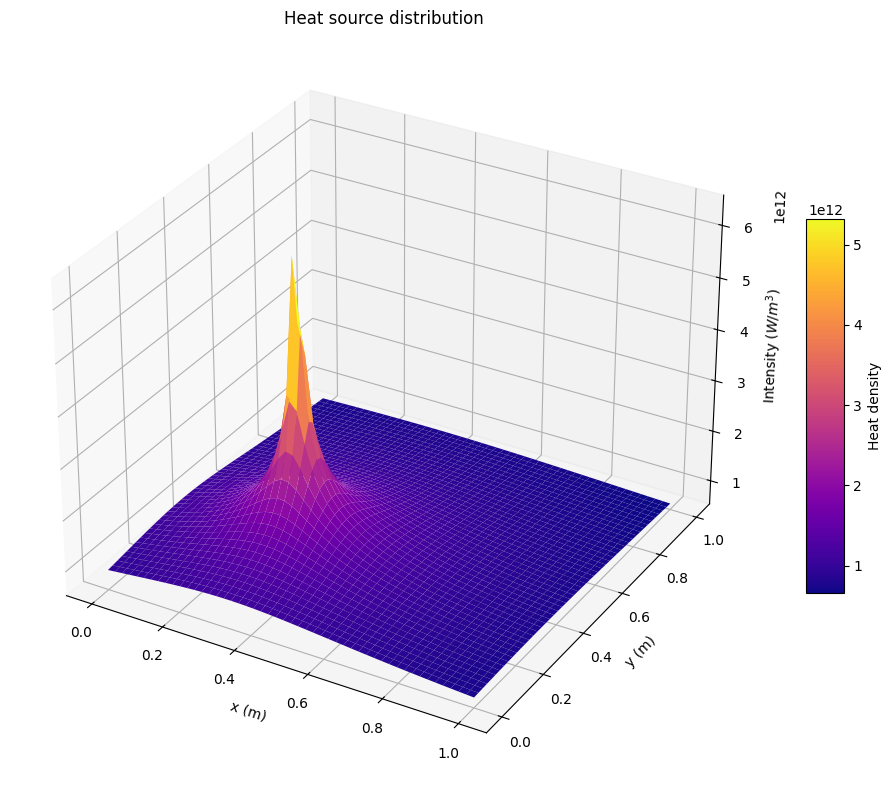

In [6]:
# 3D Plot of the heat source distribution at t=0+
X, Y = np.meshgrid(x, y)
Q = calculate_heat_source(X, Y, dt)

# Create the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface with added parameters for better visualisation
surface = ax.plot_surface(X, Y, Q, cmap="plasma", edgecolor="none")

# Add colour bar with proper label
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label="Heat density")

# Set titles and labels
ax.set_title("Heat source distribution")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("Intensity $(W/m^3)$")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Temperature evolution over time at the centre of the plate

A rapid increase in temperature occurs at the moment of the lightning strike, followed by a gradual decay as the heat dissipates due to thermal conduction and convective heat loss.


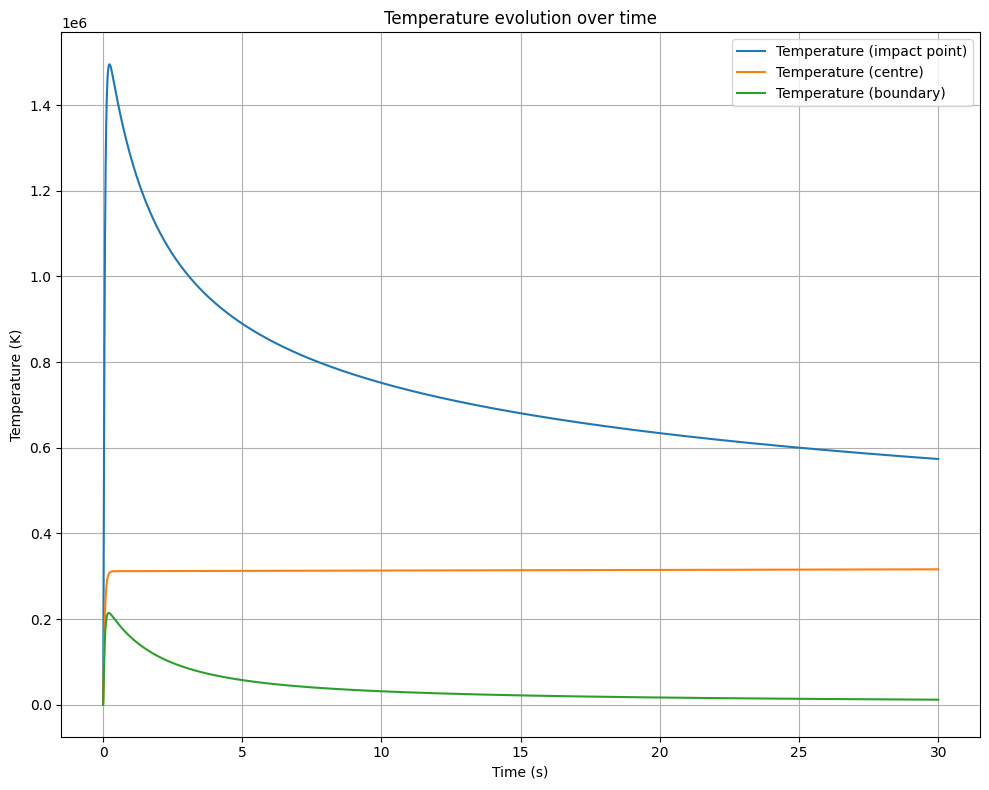

In [7]:
# Plot temperature evolution at the centre of the plate
plt.figure(figsize=(10, 8))
plt.plot(np.arange(0, t_max, dt), T_time_series, label="Temperature (impact point)")
plt.plot(np.arange(0, t_max, dt), T_centre_series, label="Temperature (centre)")
plt.plot(np.arange(0, t_max, dt), T_boundary_series, label="Temperature (boundary)")
plt.title("Temperature evolution over time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Final temperature distribution

A heatmap is used to visualise the final temperature distribution across the plate. Thermal hotspots, particularly near the point of the lightning strike, are evident, with the temperature gradually decreasing towards the plate edges.


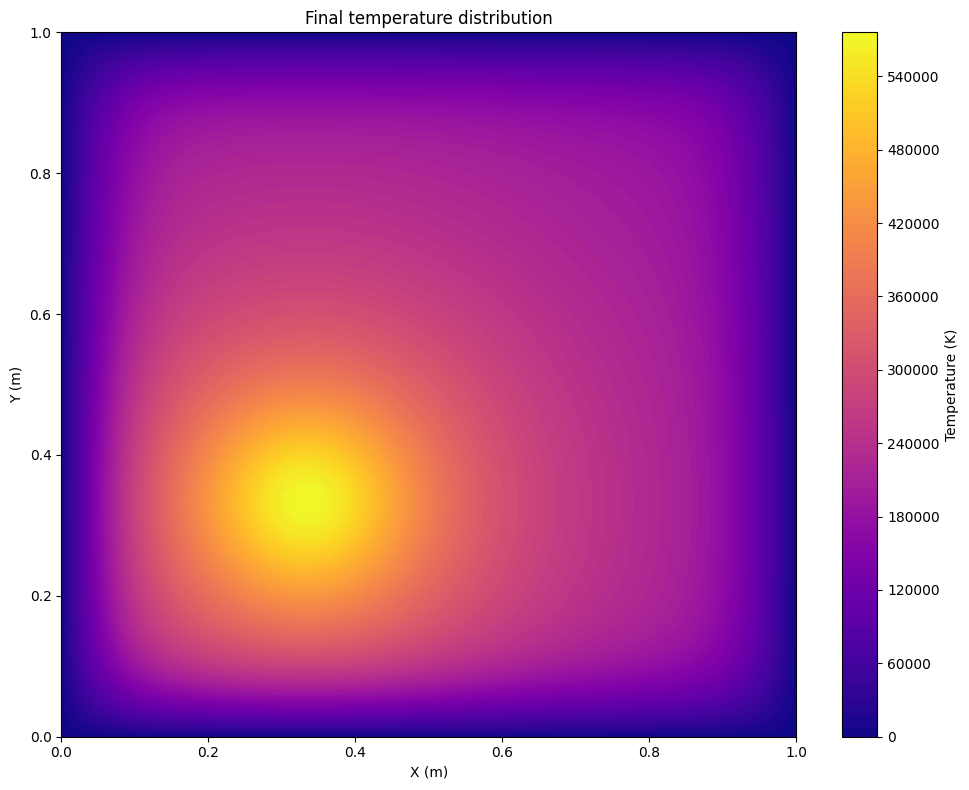

In [8]:
# Plot the final temperature distribution after the lightning strike
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, T, cmap="plasma", levels=100)
plt.colorbar(label="Temperature (K)")
plt.title("Final temperature distribution")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Temperature gradient

The temperature gradient is computed to reveal the direction and intensity of heat flow within the plate. Vectors representing the thermal flux provide insight into the heat transfer dynamics within the material.


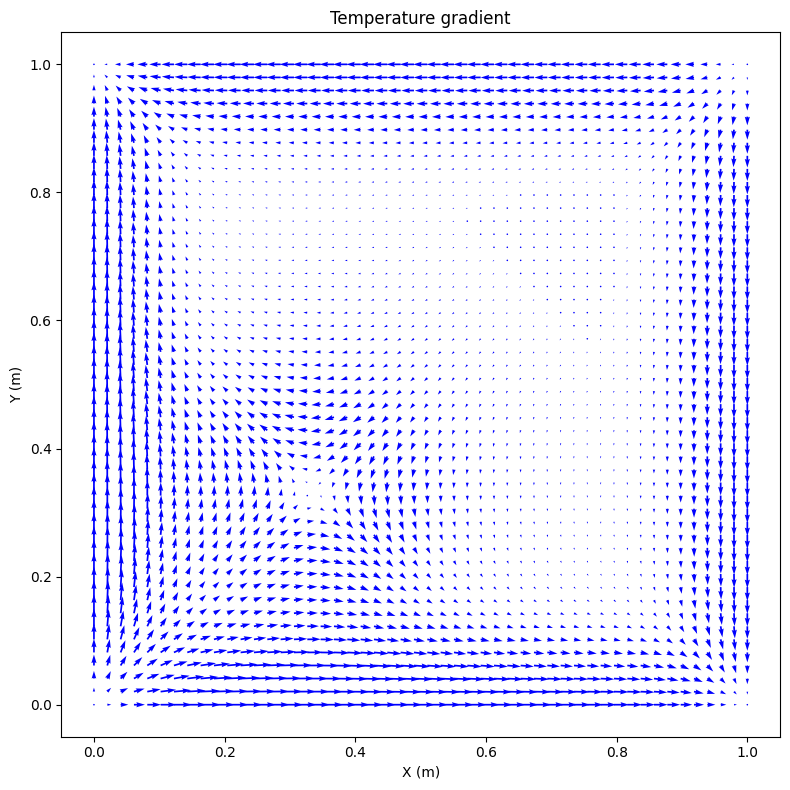

In [9]:
# Compute the temperature gradient (in both x and y directions)
gradient_x, gradient_y = np.gradient(T)

# Plot the temperature gradient vectors
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, gradient_x, gradient_y, color="blue")
plt.title("Temperature gradient")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()